In [ ]:
import pandas as pd
import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

ws = gc.open('demo').sheet1

rows = ws.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'sno':'float'})
df = df.astype({'marks':'float'})
df.head()

,sno,marks
0,1.0,70.0
1,2.0,80.0
2,3.0,90.0
3,4.0,100.0
4,5.0,95.0


In [ ]:
x = df[["sno"]].values
y = df[["marks"]].values

In [ ]:
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.],
       [50.],
       [51.],
       [52.],
       [53.],
       [54.],
       [55.]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 33)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1 = scaler.transform(x_train)

In [ ]:
marks_data = Sequential([Dense(6,activation='relu'),Dense(7,activation='relu'),Dense(1)])

In [ ]:
marks_data.compile(optimizer = 'rmsprop' , loss = 'mse')

marks_data.fit(x_train1 , y_train,epochs = 500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 6063.6929
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6053.2798 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5974.9458
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5995.1011 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6072.6782 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5938.1299 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5925.7783 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6017.5513 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6021.0566 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5928.0498
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5924.3320 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6031.1431
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5969.8394
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6016.0737 
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

<Axes: >

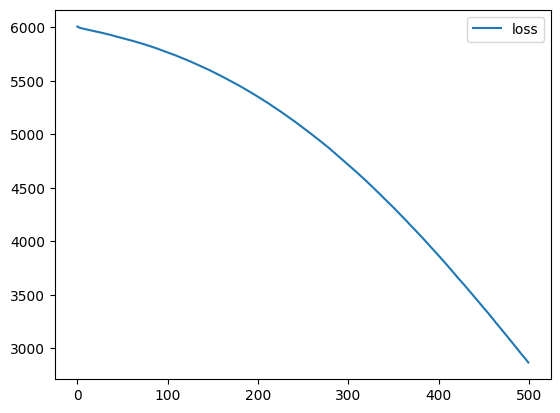

In [ ]:
loss_df = pd.DataFrame(marks_data.history.history)
loss_df.plot()

In [ ]:
x_test1 = scaler.transform(x_test)
marks_data.evaluate(x_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - loss: 2743.8223


2743.822265625

In [ ]:
X_n1 = [[30]]

X_n1_1 = scaler.transform(X_n1)

marks_data.predict(X_n1_1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[26.206417]], dtype=float32)